In [256]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [257]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Non scaled data

In [259]:
x = df.drop(["target"], axis=1)
y = df[["target"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate

reg = LinearRegression().fit(x_train, y_train)
mse_base = mean_squared_error(reg.predict(x_train), y_train)
mae_base = mean_absolute_error(reg.predict(x_train), y_train)

In [261]:
mae_base

117.50022297209

In [262]:
from keras.models import Sequential
from keras.layers import Dense

In [263]:
df.shape

(43245, 32)

## sequential neuro model

1. Начнём с однослойной модели.
2. Построим модель с двумя слоями, увеличив число нейронов на каждом до 64
3. Построим аналогичную модель, добавив прогонку по батчам
4. Построим трёхслойную модель, добавив слой с 32-мя нейронов
5. Строим модель, аналогичную прошлой, в качестве функции лосса выбрав МАЕ

In [264]:
model1 = Sequential()
model1.add(Dense(12, input_dim = 31, activation= 'relu'))
model1.add(Dense(1, activation = 'linear'))


# Compiling model
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history1 = model1.fit(x_train, y_train, epochs = 300, batch_size = None)


Epoch 1/300
906/906 [==============================] - 4s 2ms/step - loss: 95035280.0000 - mean_absolute_percentage_error: 138.8413
Epoch 2/300
906/906 [==============================] - 2s 2ms/step - loss: 1104678.5000 - mean_absolute_percentage_error: 29.5714
Epoch 3/300
906/906 [==============================] - 2s 2ms/step - loss: 571585.7500 - mean_absolute_percentage_error: 21.1252
Epoch 4/300
906/906 [==============================] - 2s 2ms/step - loss: 343663.0000 - mean_absolute_percentage_error: 15.2013
Epoch 5/300
906/906 [==============================] - 2s 2ms/step - loss: 231903.7500 - mean_absolute_percentage_error: 11.3770
Epoch 6/300
906/906 [==============================] - 1s 2ms/step - loss: 183331.0625 - mean_absolute_percentage_error: 9.8813
Epoch 7/300
906/906 [==============================] - 1s 2ms/step - loss: 146016.8750 - mean_absolute_percentage_error: 8.8576
Epoch 8/300
906/906 [==============================] - 1s 2ms/step - loss: 118884.6875 - mean_a

In [265]:
model2 = Sequential()
model2.add(Dense(64, input_dim = 31, activation= 'relu'))
model2.add(Dense(64, input_dim = 31, activation= 'relu'))
model2.add(Dense(1, activation = 'linear'))


# Compiling model
model2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history2 = model2.fit(x_train, y_train, epochs = 300, batch_size = None)


Epoch 1/300
906/906 [==============================] - 2s 2ms/step - loss: 155238.8281 - mean_absolute_percentage_error: 10.2322
Epoch 2/300
906/906 [==============================] - 1s 2ms/step - loss: 60022.1406 - mean_absolute_percentage_error: 6.6528
Epoch 3/300
906/906 [==============================] - 1s 2ms/step - loss: 52827.2500 - mean_absolute_percentage_error: 6.2148
Epoch 4/300
906/906 [==============================] - 1s 2ms/step - loss: 46982.4297 - mean_absolute_percentage_error: 5.8481
Epoch 5/300
906/906 [==============================] - 1s 2ms/step - loss: 45080.3633 - mean_absolute_percentage_error: 5.6861
Epoch 6/300
906/906 [==============================] - 1s 2ms/step - loss: 43486.1328 - mean_absolute_percentage_error: 5.5775
Epoch 7/300
906/906 [==============================] - 1s 2ms/step - loss: 43536.3828 - mean_absolute_percentage_error: 5.5716
Epoch 8/300
906/906 [==============================] - 1s 2ms/step - loss: 42911.9531 - mean_absolute_percent

In [266]:
model3 = Sequential()
model3.add(Dense(64, input_dim = 31, activation= 'relu'))
model3.add(Dense(64, input_dim = 31, activation= 'relu'))
model3.add(Dense(1, activation = 'linear'))


# Compiling model
model3.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history3 = model3.fit(x_train, y_train, epochs = 300, batch_size = 100)


Epoch 1/300
290/290 [==============================] - 1s 2ms/step - loss: 330275.4062 - mean_absolute_percentage_error: 14.6836
Epoch 2/300
290/290 [==============================] - 0s 2ms/step - loss: 83906.2891 - mean_absolute_percentage_error: 7.6831
Epoch 3/300
290/290 [==============================] - 0s 2ms/step - loss: 56949.7344 - mean_absolute_percentage_error: 6.3984
Epoch 4/300
290/290 [==============================] - 0s 2ms/step - loss: 51795.8125 - mean_absolute_percentage_error: 6.1421
Epoch 5/300
290/290 [==============================] - 0s 2ms/step - loss: 50584.2969 - mean_absolute_percentage_error: 6.1233
Epoch 6/300
290/290 [==============================] - 0s 2ms/step - loss: 47071.8008 - mean_absolute_percentage_error: 5.8598
Epoch 7/300
290/290 [==============================] - 0s 2ms/step - loss: 46880.6953 - mean_absolute_percentage_error: 5.8741
Epoch 8/300
290/290 [==============================] - 0s 2ms/step - loss: 42827.2305 - mean_absolute_percent

In [267]:
model4 = Sequential()
model4.add(Dense(64, input_dim = 31, activation= 'relu'))
model4.add(Dense(64, input_dim = 31, activation= 'relu'))
model4.add(Dense(32, input_dim = 31, activation= 'relu'))
model4.add(Dense(1, activation = 'linear'))


# Compiling model
model4.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history4 = model4.fit(x_train, y_train, epochs = 300, batch_size = 100)


Epoch 1/300
290/290 [==============================] - 2s 2ms/step - loss: 888213.4375 - mean_absolute_percentage_error: 18.8483
Epoch 2/300
290/290 [==============================] - 1s 2ms/step - loss: 88305.7812 - mean_absolute_percentage_error: 7.8954
Epoch 3/300
290/290 [==============================] - 1s 2ms/step - loss: 54624.9492 - mean_absolute_percentage_error: 6.2103
Epoch 4/300
290/290 [==============================] - 1s 2ms/step - loss: 43427.3633 - mean_absolute_percentage_error: 5.4309
Epoch 5/300
290/290 [==============================] - 1s 2ms/step - loss: 43224.2500 - mean_absolute_percentage_error: 5.4950
Epoch 6/300
290/290 [==============================] - 1s 2ms/step - loss: 41404.2422 - mean_absolute_percentage_error: 5.3694
Epoch 7/300
290/290 [==============================] - 0s 2ms/step - loss: 41039.4180 - mean_absolute_percentage_error: 5.3648
Epoch 8/300
290/290 [==============================] - 0s 2ms/step - loss: 37839.3164 - mean_absolute_percent

In [268]:
model5 = Sequential()
model5.add(Dense(64, input_dim = 31, activation= 'relu'))
model5.add(Dense(64, input_dim = 31, activation= 'relu'))
model5.add(Dense(32, input_dim = 31, activation= 'relu'))
model5.add(Dense(1, activation = 'linear'))


# Compiling model
model5.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history5 = model5.fit(x_train, y_train, epochs = 300, batch_size = 100)


Epoch 1/300
290/290 [==============================] - 1s 2ms/step - loss: 368.5747 - mean_absolute_percentage_error: 13.7561
Epoch 2/300
290/290 [==============================] - 1s 2ms/step - loss: 211.7731 - mean_absolute_percentage_error: 7.8626
Epoch 3/300
290/290 [==============================] - 0s 2ms/step - loss: 171.5722 - mean_absolute_percentage_error: 6.3738
Epoch 4/300
290/290 [==============================] - 0s 2ms/step - loss: 160.0609 - mean_absolute_percentage_error: 5.9639
Epoch 5/300
290/290 [==============================] - 0s 2ms/step - loss: 146.2429 - mean_absolute_percentage_error: 5.4530
Epoch 6/300
290/290 [==============================] - 0s 2ms/step - loss: 139.1624 - mean_absolute_percentage_error: 5.1940
Epoch 7/300
290/290 [==============================] - 0s 2ms/step - loss: 138.6705 - mean_absolute_percentage_error: 5.1804
Epoch 8/300
290/290 [==============================] - 1s 2ms/step - loss: 129.7624 - mean_absolute_percentage_error: 4.8506

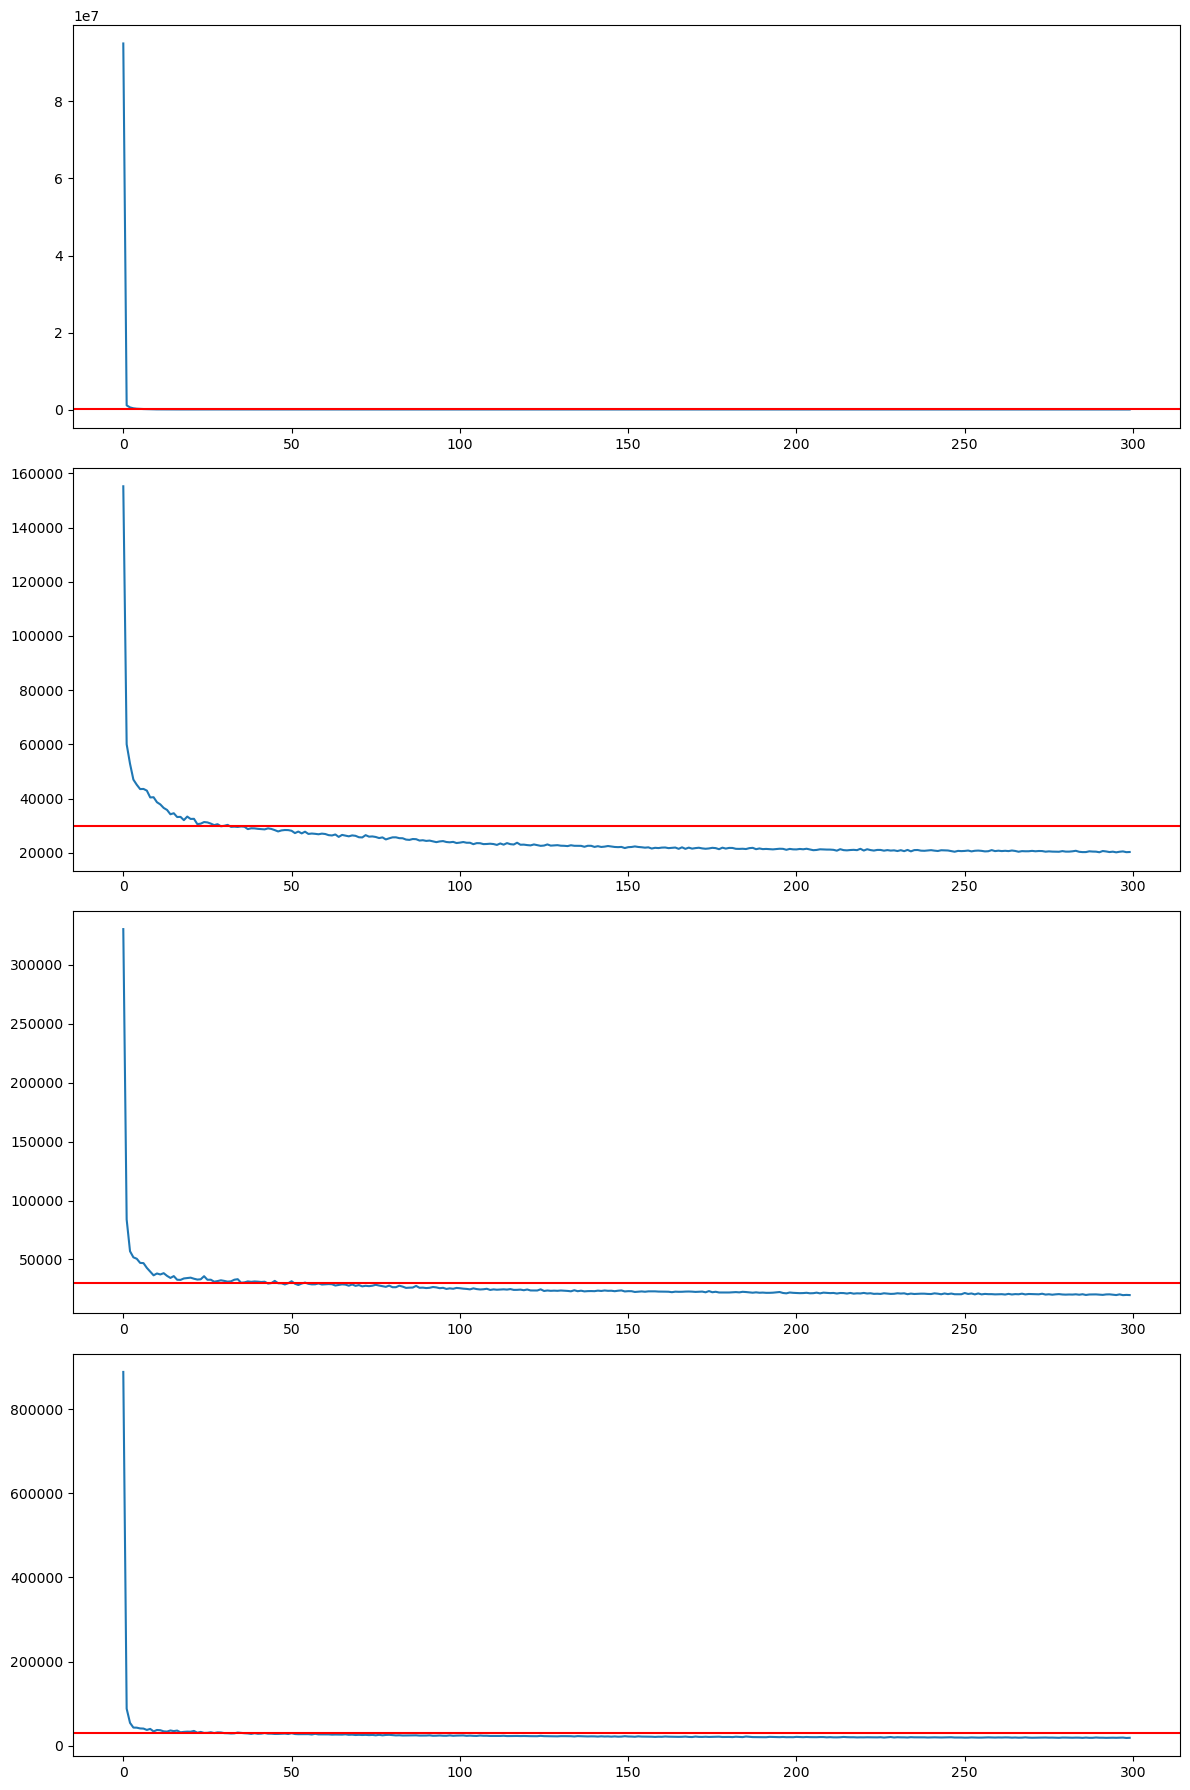

In [269]:
hist_list = [history1, history2, history3, history4, history5]

fig, axes = plt.subplots(4, 1, figsize = (12,18))

for hist, ax in zip(hist_list, axes.ravel()):
    ax.plot(hist.history['loss'])
    ax.axhline(mse_base, color = 'red', ds = 'steps')
    #ax.title(f'history {hist}, MSE')
    
plt.tight_layout()

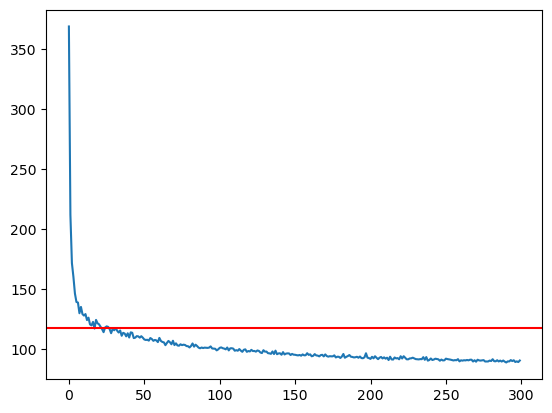

In [270]:
plt.plot(history5.history['loss'])
plt.axhline(mae_base, color = 'red', ds = 'steps')

In [271]:
mean_squared_error(reg.predict(x_test), y_test), mean_absolute_error(reg.predict(x_test), y_test),

(31021.02439985445, 120.06172119620595)

In [272]:
mean_squared_error(model1.predict(x_test), y_test), mean_absolute_error(model1.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(26566.71669959549, 109.35387669514444)

In [273]:
mean_squared_error(model2.predict(x_test), y_test), mean_absolute_error(model2.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(21251.8253860905, 93.49845648757479)

In [274]:
mean_squared_error(model3.predict(x_test), y_test), mean_absolute_error(model3.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(21480.245735190983, 96.80904461722527)

In [275]:
mean_squared_error(model4.predict(x_test), y_test), mean_absolute_error(model4.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(22034.35196150931, 98.35145482561883)

In [276]:
mean_squared_error(model5.predict(x_test), y_test), mean_absolute_error(model5.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(21802.231595206427, 91.34565672100271)

# Normalization

In [277]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [278]:
data_scaled.shape

(43245, 32)

In [279]:
x = data_scaled[:, :-1]
y = data_scaled[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [280]:
y.shape, x.shape

((43245,), (43245, 31))

In [281]:
reg = LinearRegression().fit(x_train, y_train)
mse_base = mean_squared_error(reg.predict(x_train), y_train)
mae_base = mean_absolute_error(reg.predict(x_train), y_train)

In [282]:
model1 = Sequential()
model1.add(Dense(12, input_dim = 31, activation= 'relu'))
model1.add(Dense(1, activation = 'linear'))


# Compiling model
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history1 = model1.fit(x_train, y_train, epochs = 200, batch_size = None)


Epoch 1/200
906/906 [==============================] - 2s 1ms/step - loss: 0.6317 - mean_absolute_percentage_error: 228.8509
Epoch 2/200
906/906 [==============================] - 1s 2ms/step - loss: 0.4620 - mean_absolute_percentage_error: 214.8748
Epoch 3/200
906/906 [==============================] - 1s 2ms/step - loss: 0.4201 - mean_absolute_percentage_error: 205.5791
Epoch 4/200
906/906 [==============================] - 1s 1ms/step - loss: 0.3977 - mean_absolute_percentage_error: 207.6529
Epoch 5/200
906/906 [==============================] - 1s 1ms/step - loss: 0.3831 - mean_absolute_percentage_error: 208.7088
Epoch 6/200
906/906 [==============================] - 1s 2ms/step - loss: 0.3737 - mean_absolute_percentage_error: 209.2255
Epoch 7/200
906/906 [==============================] - 1s 1ms/step - loss: 0.3674 - mean_absolute_percentage_error: 206.0486
Epoch 8/200
906/906 [==============================] - 1s 1ms/step - loss: 0.3609 - mean_absolute_percentage_error: 203.7287


In [283]:
model2 = Sequential()
model2.add(Dense(64, input_dim = 31, activation= 'relu'))
model2.add(Dense(64, input_dim = 31, activation= 'relu'))
model2.add(Dense(1, activation = 'linear'))


# Compiling model
model2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history2 = model2.fit(x_train, y_train, epochs = 200, batch_size = None)


Epoch 1/200
906/906 [==============================] - 2s 2ms/step - loss: 0.4483 - mean_absolute_percentage_error: 212.4295
Epoch 2/200
906/906 [==============================] - 1s 2ms/step - loss: 0.3405 - mean_absolute_percentage_error: 188.9969
Epoch 3/200
906/906 [==============================] - 1s 2ms/step - loss: 0.3073 - mean_absolute_percentage_error: 189.3583
Epoch 4/200
906/906 [==============================] - 1s 2ms/step - loss: 0.2823 - mean_absolute_percentage_error: 185.7860
Epoch 5/200
906/906 [==============================] - 2s 2ms/step - loss: 0.2629 - mean_absolute_percentage_error: 180.2451
Epoch 6/200
906/906 [==============================] - 1s 2ms/step - loss: 0.2485 - mean_absolute_percentage_error: 175.1830
Epoch 7/200
906/906 [==============================] - 1s 2ms/step - loss: 0.2387 - mean_absolute_percentage_error: 173.9149
Epoch 8/200
906/906 [==============================] - 1s 2ms/step - loss: 0.2272 - mean_absolute_percentage_error: 167.3408


In [284]:
model3 = Sequential()
model3.add(Dense(64, input_dim = 31, activation= 'relu'))
model3.add(Dense(64, input_dim = 31, activation= 'relu'))
model3.add(Dense(1, activation = 'linear'))


# Compiling model
model3.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history3 = model3.fit(x_train, y_train, epochs = 200, batch_size = 100)


Epoch 1/200
290/290 [==============================] - 1s 2ms/step - loss: 0.5338 - mean_absolute_percentage_error: 218.7593
Epoch 2/200
290/290 [==============================] - 0s 2ms/step - loss: 0.3856 - mean_absolute_percentage_error: 200.7879
Epoch 3/200
290/290 [==============================] - 0s 2ms/step - loss: 0.3399 - mean_absolute_percentage_error: 197.4160
Epoch 4/200
290/290 [==============================] - 0s 2ms/step - loss: 0.3123 - mean_absolute_percentage_error: 189.9979
Epoch 5/200
290/290 [==============================] - 0s 2ms/step - loss: 0.2888 - mean_absolute_percentage_error: 179.2005
Epoch 6/200
290/290 [==============================] - 0s 2ms/step - loss: 0.2739 - mean_absolute_percentage_error: 181.4458
Epoch 7/200
290/290 [==============================] - 0s 1ms/step - loss: 0.2612 - mean_absolute_percentage_error: 179.8457
Epoch 8/200
290/290 [==============================] - 0s 2ms/step - loss: 0.2553 - mean_absolute_percentage_error: 169.8607


In [285]:
model4 = Sequential()
model4.add(Dense(64, input_dim = 31, activation= 'relu'))
model4.add(Dense(64, input_dim = 31, activation= 'relu'))
model4.add(Dense(32, input_dim = 31, activation= 'relu'))
model4.add(Dense(1, activation = 'linear'))


# Compiling model
model4.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history4 = model4.fit(x_train, y_train, epochs = 200, batch_size = 100)


Epoch 1/200
290/290 [==============================] - 2s 2ms/step - loss: 0.4933 - mean_absolute_percentage_error: 203.5709
Epoch 2/200
290/290 [==============================] - 1s 2ms/step - loss: 0.3580 - mean_absolute_percentage_error: 201.9957
Epoch 3/200
290/290 [==============================] - 1s 2ms/step - loss: 0.3110 - mean_absolute_percentage_error: 196.5686
Epoch 4/200
290/290 [==============================] - 1s 2ms/step - loss: 0.2808 - mean_absolute_percentage_error: 193.3380
Epoch 5/200
290/290 [==============================] - 1s 2ms/step - loss: 0.2589 - mean_absolute_percentage_error: 180.0529
Epoch 6/200
290/290 [==============================] - 1s 2ms/step - loss: 0.2420 - mean_absolute_percentage_error: 176.0429
Epoch 7/200
290/290 [==============================] - 1s 2ms/step - loss: 0.2307 - mean_absolute_percentage_error: 169.2837
Epoch 8/200
290/290 [==============================] - 1s 2ms/step - loss: 0.2187 - mean_absolute_percentage_error: 168.2960


In [286]:
model5 = Sequential()
model5.add(Dense(64, input_dim = 31, activation= 'relu'))
model5.add(Dense(64, input_dim = 31, activation= 'relu'))
model5.add(Dense(32, input_dim = 31, activation= 'relu'))
model5.add(Dense(1, activation = 'linear'))


# Compiling model
model5.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mean_absolute_percentage_error'])


# Training a model
history5 = model5.fit(x_train, y_train, epochs = 200, batch_size = 100)


Epoch 1/200
290/290 [==============================] - 1s 2ms/step - loss: 0.4496 - mean_absolute_percentage_error: 197.6068
Epoch 2/200
290/290 [==============================] - 1s 2ms/step - loss: 0.3670 - mean_absolute_percentage_error: 176.9419
Epoch 3/200
290/290 [==============================] - 1s 2ms/step - loss: 0.3426 - mean_absolute_percentage_error: 165.2709
Epoch 4/200
290/290 [==============================] - 1s 2ms/step - loss: 0.3295 - mean_absolute_percentage_error: 156.1718
Epoch 5/200
290/290 [==============================] - 1s 2ms/step - loss: 0.3178 - mean_absolute_percentage_error: 154.1192
Epoch 6/200
290/290 [==============================] - 1s 2ms/step - loss: 0.3097 - mean_absolute_percentage_error: 147.3373
Epoch 7/200
290/290 [==============================] - 1s 2ms/step - loss: 0.3021 - mean_absolute_percentage_error: 141.2861
Epoch 8/200
290/290 [==============================] - 0s 2ms/step - loss: 0.2950 - mean_absolute_percentage_error: 138.0249


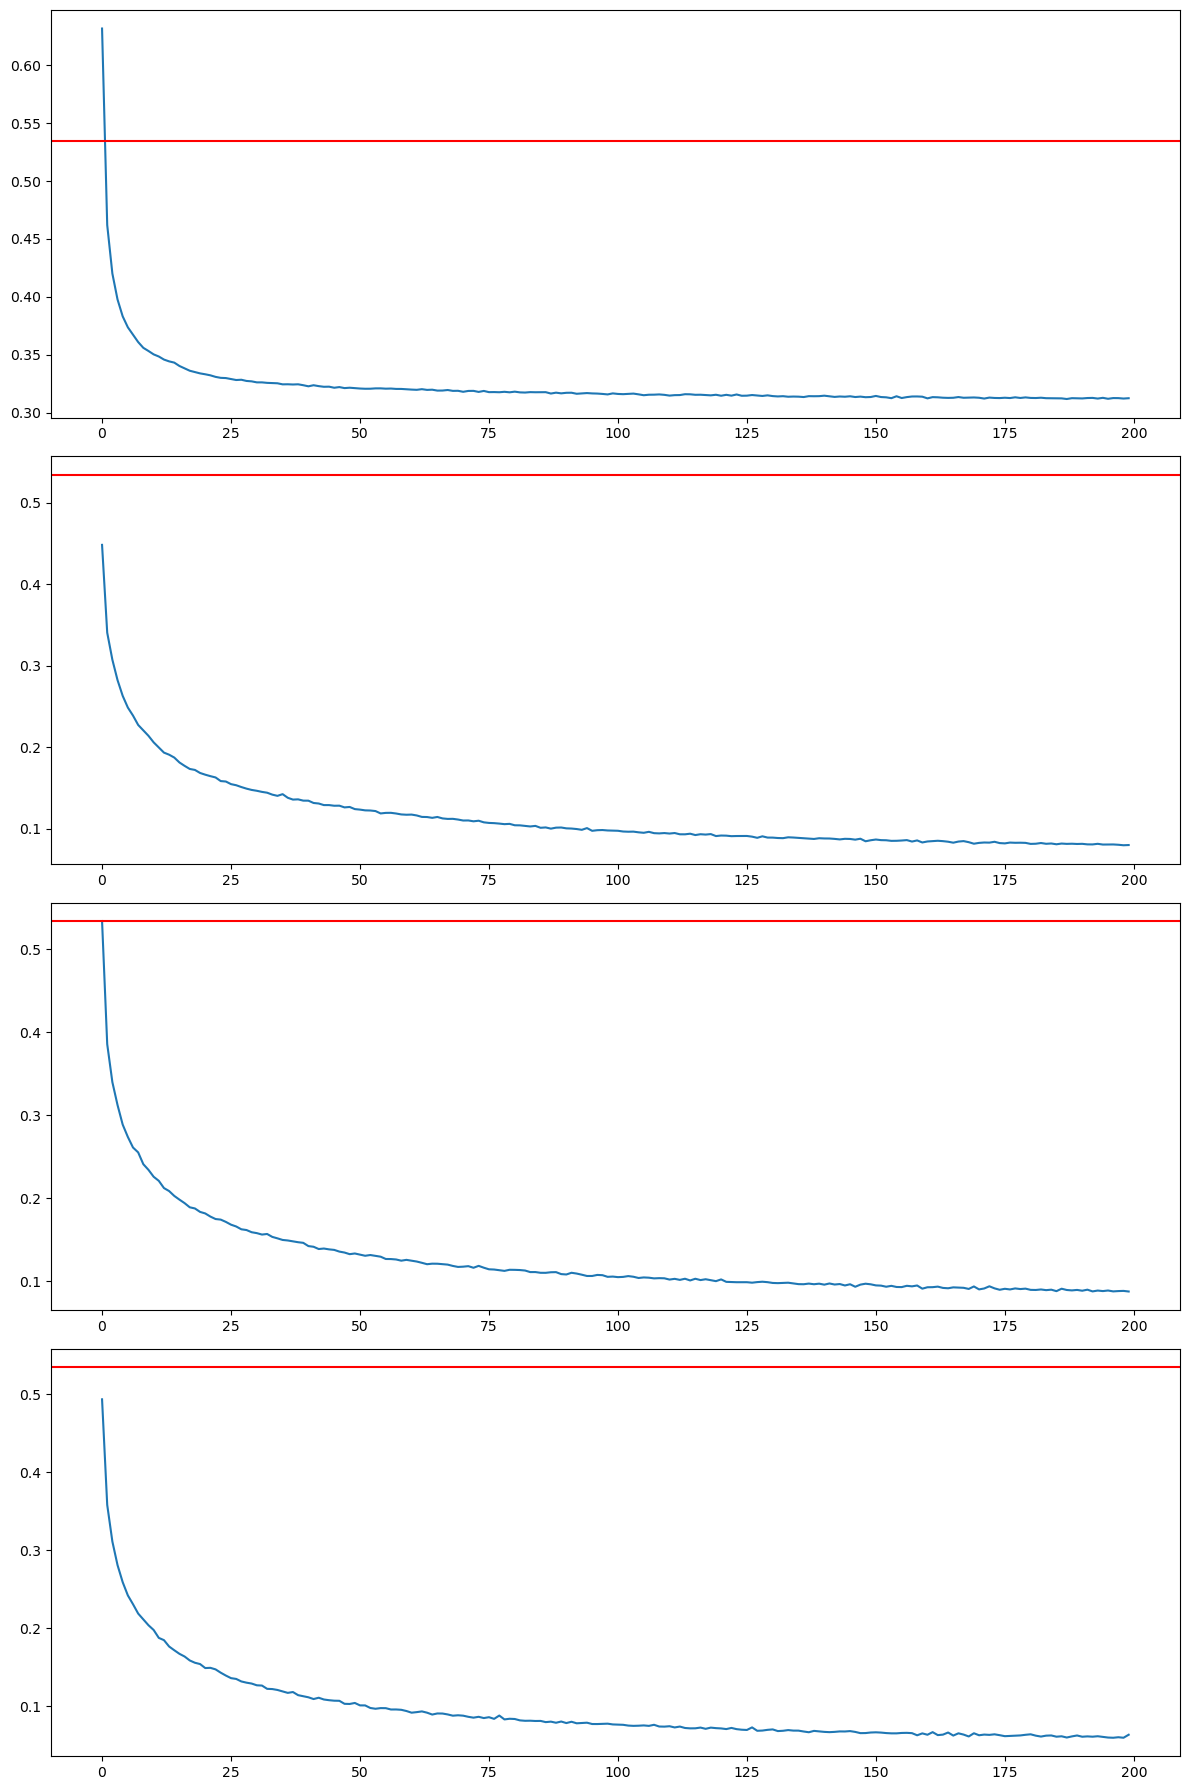

In [287]:
hist_list = [history1, history2, history3, history4, history5]

fig, axes = plt.subplots(4, 1, figsize = (12,18))

for hist, ax in zip(hist_list, axes.ravel()):
    ax.plot(hist.history['loss'])
    ax.axhline(mse_base, color = 'red', ds = 'steps')
    #ax.title(f'history {hist}, MSE')
    
plt.tight_layout()

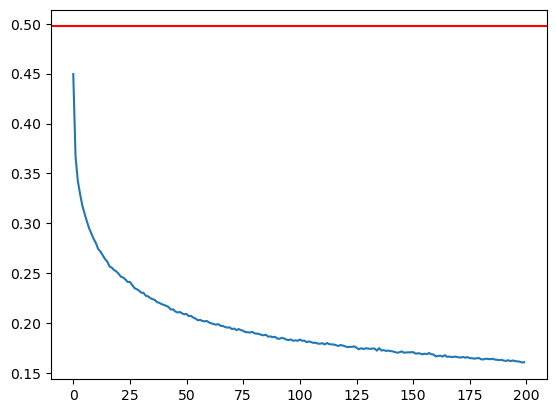

In [288]:
plt.plot(history5.history['loss'])
plt.axhline(mae_base, color = 'red', ds = 'steps')

In [289]:
mean_squared_error(reg.predict(x_test), y_test), mean_absolute_error(reg.predict(x_test), y_test),

(0.5554966662144392, 0.5080625993996722)

In [290]:
mean_squared_error(model1.predict(x_test), y_test), mean_absolute_error(model1.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(0.3213399046258542, 0.36712817710906237)

In [291]:
mean_squared_error(model2.predict(x_test), y_test), mean_absolute_error(model2.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(0.17858903746808732, 0.26305171119408216)

In [292]:
mean_squared_error(model3.predict(x_test), y_test), mean_absolute_error(model3.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(0.18703798995603296, 0.27657401273928034)

In [293]:
mean_squared_error(model4.predict(x_test), y_test), mean_absolute_error(model4.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(0.17750598960547428, 0.2597770927069241)

In [294]:
mean_squared_error(model5.predict(x_test), y_test), mean_absolute_error(model5.predict(x_test), y_test)

446/446 [==============================] - 1s 1ms/step


(0.17566658579255984, 0.22976356586623586)

In [295]:
from sklearn.metrics import r2_score

In [296]:
r2_score(reg.predict(x_test), y_test), r2_score(reg.predict(x_train), y_train)

(-0.20628694509579293, -0.19519363953181768)

In [297]:
r2_score(model1.predict(x_test), y_test), r2_score(model1.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(0.5274084451957857, 0.5134141260029104)

In [298]:
r2_score(model2.predict(x_test), y_test), r2_score(model2.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(0.812925157910056, 0.9191176936605083)

In [299]:
r2_score(model3.predict(x_test), y_test), r2_score(model3.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(0.809894445777406, 0.9125166052627177)

In [300]:
r2_score(model4.predict(x_test), y_test), r2_score(model4.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(0.8178103014379786, 0.939715833530914)

In [301]:
r2_score(model5.predict(x_test), y_test), r2_score(model5.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(0.8113502121963194, 0.8809576966266833)

In [302]:
from sklearn.metrics import mean_absolute_percentage_error

In [303]:
mean_absolute_percentage_error(reg.predict(x_test), y_test), mean_absolute_percentage_error(reg.predict(x_train), y_train)

(10.050159918755314, 5.030890758754613)

In [304]:
mean_absolute_percentage_error(model1.predict(x_test), y_test), mean_absolute_percentage_error(model1.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(3.8742933970683446, 6.447529967425732)

In [305]:
mean_absolute_percentage_error(model2.predict(x_test), y_test), mean_absolute_percentage_error(model2.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(1.7237000610856146, 2.1076325262995566)

In [306]:
mean_absolute_percentage_error(model3.predict(x_test), y_test), mean_absolute_percentage_error(model3.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(1.61789257859659, 2.4639766348507397)

In [307]:
mean_absolute_percentage_error(model4.predict(x_test), y_test), mean_absolute_percentage_error(model4.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(8.064954134101741, 2.0214249411937955)

In [308]:
mean_absolute_percentage_error(model5.predict(x_test), y_test), mean_absolute_percentage_error(model5.predict(x_train), y_train)

906/906 [==============================] - 1s 1ms/step


(1.9642176032672527, 1.4171680854258917)

In [309]:
#model3.save('model_mse_scaled.keras')
#model5.save('model_mae_scaled.keras')

In [310]:
os.getcwd()

'C:\\Users\\hawksworth\\Untitled Folder'